In [3]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble, transpile, execute
from qiskit.visualization import plot_histogram

1. 異なる形の分布型、定値型のオラクルを作成できますか？

定値型として1を返すオラクルを作成する。

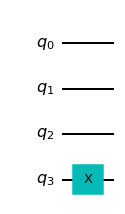

In [4]:
# 入力ビット数
n = 3

# 定値型オラクルの作成
const_oracle = QuantumCircuit(n+1)
const_oracle.x(n)

const_oracle.draw('mpl')

分布型のオラクルを作成する。

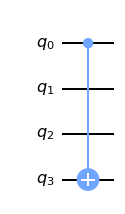

In [5]:
# 入力ビット数
n = 3

# 分布型オラクルの作成
balanced_oracle = QuantumCircuit(n+1)
balanced_oracle.cx(0, n)

balanced_oracle.draw('mpl')

実際に分布型であることを確認する。

In [10]:
qc = QuantumCircuit(n+1)
# 結果確認用の変数を用意
results = ["f(x:入力)=出力"]
for i in range(2**3):
    qc = QuantumCircuit(5,1)
    # 10進数を3桁の2進数に変換し、'1'のときにxゲートを作用
    for j in range(3):
        if format(i, '03b')[j] == '1':
            qc.x(j)
    qc.append(balanced_oracle, range(4))
    # q_3ビットの測定結果をq_0に格納（q_3の結果をq_0に格納し、q_0を測定する）
    qc.measure(3,0)
    # 回路確認用コマンド
    # display(qc.draw('mpl'))
    # Qiskitのシミュレーション方法を指定
    backend = Aer.get_backend('statevector_simulator')
    # シミュレーション実行
    result = execute(qc,backend).result()
    counts = result.get_counts()
    # 結果を格納
    results.append(f'f({i}) = {list(counts.keys())[0]}')
results

['f(x:入力)=出力',
 'f(0) = 0',
 'f(1) = 0',
 'f(2) = 0',
 'f(3) = 0',
 'f(4) = 1',
 'f(5) = 1',
 'f(6) = 1',
 'f(7) = 1']

In [17]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)
# oracle = dj_problem_oracle(2)
# oracle = dj_problem_oracle(3)
# oracle = dj_problem_oracle(4)
# oracle = dj_problem_oracle(5)

2. 上記の関数`dj_problem_oracle`は、`n = 4`のドイチ-ジョサオラクルをゲートの形式で返します。ゲートの入力は5量子ビットで、最後の量子ビット（`q_4`）が出力量子ビットです。 `dj_problem_oracle` に1〜5の異なる整数を指定することで、異なるオラクルを取得できます。ドイチ-ジョサのアルゴリズムを使用して、各オラクルが分布型か定値型かを判断してください（**注**：実デバイスではなく、`qasm_simulator`を使用して試すことを強くお勧めします） 。

例として１の場合（dj_problem_oracle(1)）を記載します。

In [18]:
# テキストのアルゴリズムを定義
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # 出力ビットの設定
    dj_circuit.x(n)
    dj_circuit.h(n)
    # 入力ビットの設定
    for qubit in range(n):
        dj_circuit.h(qubit)
    # オラクルゲートを追加
    dj_circuit.append(oracle, range(n+1))
    # Hゲートを適用
    for qubit in range(n):
        dj_circuit.h(qubit)
    # 測定
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

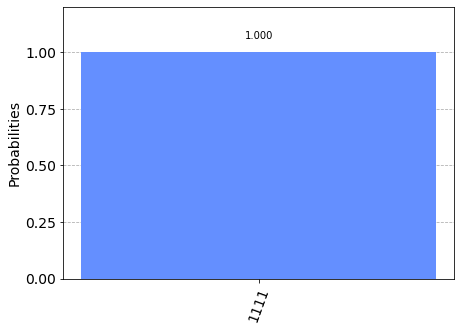

In [19]:
# 入力量子ビット数
n = 4
# 回路に上で定義したアルゴリズムを追加
dj_circuit = dj_algorithm(oracle, n)
# Qiskitのシミュレーション方法を指定
aer_sim = Aer.get_backend('aer_simulator')
# シミュレーション実行
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
# 結果を格納
answer = results.get_counts()
plot_histogram(answer)

シミュレーション結果より、$\vert 0 \rangle ^{\otimes n}$の確率が「0」であることが分かるため、分布型である。  
実際に分布型であることを確かめる。

In [20]:
qc = QuantumCircuit(5,1)
results = ["f(x:入力)=出力"]
for i in range(2**4):
    qc = QuantumCircuit(5,1)
    for j in range(4):
        if format(i, '04b')[j] == '1':
            qc.x(j)
    qc.append(oracle, range(5))
    qc.measure(4,0)
    # display(qc.draw('mpl'))
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc,backend).result()
    counts = result.get_counts()
    results.append(f'f({i}) = {list(counts.keys())[0]}')
results

['f(x:入力)=出力',
 'f(0) = 0',
 'f(1) = 1',
 'f(2) = 1',
 'f(3) = 0',
 'f(4) = 1',
 'f(5) = 0',
 'f(6) = 0',
 'f(7) = 1',
 'f(8) = 1',
 'f(9) = 0',
 'f(10) = 0',
 'f(11) = 1',
 'f(12) = 0',
 'f(13) = 1',
 'f(14) = 1',
 'f(15) = 0']